# Exploratory Data Analysis (EDA)

## Índice
1. [Introducción](#introducción)
2. [Carga de Datos](#carga-de-datos)
3. [Análisis Univariado](#análisis-univariado)
4. [Análisis Bivariado](#análisis-bivariado)
5. [Análisis Multivariado](#análisis-multivariado)
6. [Conclusiones](#conclusiones)


# Introducción

En esta competencia de [predicción de ventas de la empresa 1C](https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales), el objetivo es predecir las ventas futuras de una serie de productos en diferentes tiendas. Los datos proporcionados incluyen información histórica de ventas, así como características adicionales de los productos y las tiendas.

### Archivos en el dataset

- `train.csv`: Contiene el historial de ventas diarias de cada tienda y producto.
- `test.csv`: Contiene las tiendas y productos para los cuales se deben predecir las ventas.
- `sample_submission.csv`: Un archivo de ejemplo que muestra el formato esperado para las predicciones.
- `items.csv`: Contiene información adicional sobre los productos.
- `shops.csv`: Contiene información adicional sobre las tiendas.
- `item_categories.csv`: Contiene información adicional sobre las categorías de productos.

# Carga de Datos

In [2]:
# -*- coding: utf-8 -*-
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carga de datos
sales_train_df = pd.read_csv("/Users/davidescudero/Documents/ITAM/PDT02/data/sales_train.csv")

print("🚀 Datos cargados exitosamente. ¡Listos para el análisis!")

# Mostrar las primeras filas del dataset
print("📝 Primeras filas del dataset:")
print(sales_train_df.head())

# Información general del dataset
print("📊 Información general del dataset:")
print(sales_train_df.info())

# Descripción estadística del dataset
print("📈 Descripción estadística del dataset:")
print(sales_train_df.describe())


🚀 Datos cargados exitosamente. ¡Listos para el análisis!
📝 Primeras filas del dataset:
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
📈 Descripción estadís

In [3]:
# Convertir la columna 'date' a tipo datetime
sales_train_df['date'] = pd.to_datetime(sales_train_df['date'], format='%d.%m.%Y')

# Verificar el cambio
print("Cambio en fecha:")
print(sales_train_df['date'].head())
print(sales_train_df['date'].info())

Cambio en fecha:
0   2013-01-02
1   2013-01-03
2   2013-01-05
3   2013-01-06
4   2013-01-15
Name: date, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>
RangeIndex: 2935849 entries, 0 to 2935848
Series name: date
Non-Null Count    Dtype         
--------------    -----         
2935849 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.4 MB
None


In [4]:
# Convertir la columna 'item_id' a tipo categórico
sales_train_df['item_id'] = sales_train_df['item_id'].astype('category')

# Verificar el cambio
print("Cambio en item_id:")
print(sales_train_df['item_id'].head())
print(sales_train_df['item_id'].info())

Cambio en item_id:
0    22154
1     2552
2     2552
3     2554
4     2555
Name: item_id, dtype: category
Categories (21807, int64): [0, 1, 2, 3, ..., 22166, 22167, 22168, 22169]
<class 'pandas.core.series.Series'>
RangeIndex: 2935849 entries, 0 to 2935848
Series name: item_id
Non-Null Count    Dtype   
--------------    -----   
2935849 non-null  category
dtypes: category(1)
memory usage: 6.3 MB
None


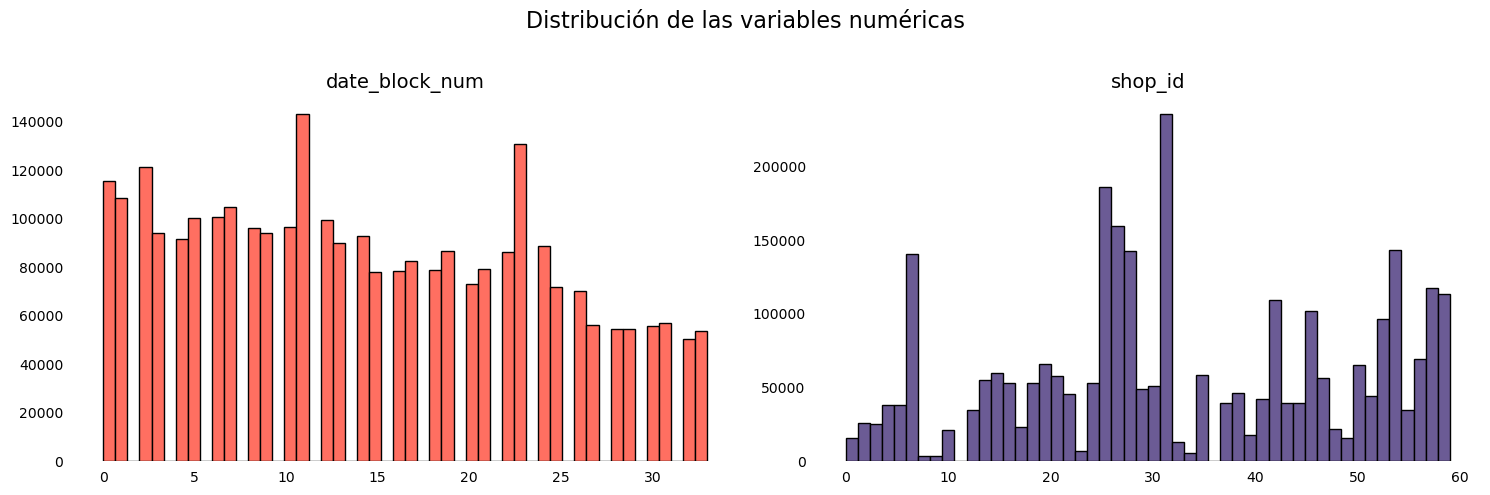

In [5]:
# Visualización de las variables numéricas siguiendo las reglas de Tufte
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Distribución de las variables numéricas', fontsize=16)

# Lista de columnas numéricas actualizada
columns = ['date_block_num', 'shop_id']
colors = ['#FF6F61', '#6B5B95']  # Colores estéticos actualizados

for ax, column, color in zip(axes.flatten(), columns, colors):
    ax.hist(sales_train_df[column], bins=50, edgecolor='black', color=color)
    ax.set_title(column, fontsize=14)
    ax.grid(False)  # Eliminar la cuadrícula
    ax.spines['top'].set_visible(False)  # Eliminar el borde superior
    ax.spines['right'].set_visible(False)  # Eliminar el borde derecho
    ax.spines['left'].set_visible(False)  # Eliminar el borde izquierdo
    ax.spines['bottom'].set_visible(False)  # Eliminar el borde inferior
    ax.tick_params(left=False, bottom=False)  # Eliminar las marcas de los ejes

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

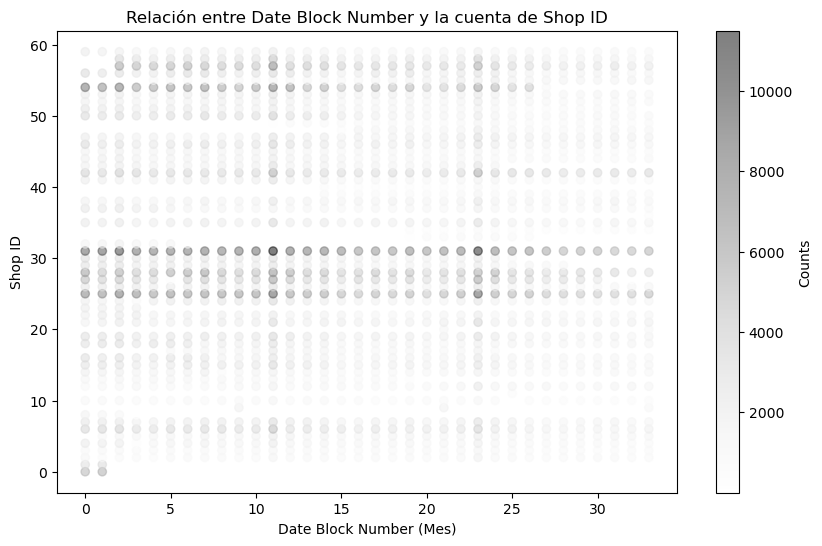

In [6]:
# Agrupar los datos por 'date_block_num' y 'shop_id' y contar las ocurrencias
grouped_data = sales_train_df.groupby(['date_block_num', 'shop_id']).size().reset_index(name='counts')

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de dispersión
scatter = ax.scatter(grouped_data['date_block_num'], grouped_data['shop_id'], alpha=0.5, c=grouped_data['counts'], cmap='Greys')

# Añadir etiquetas y título
ax.set_xlabel('Date Block Number (Mes)')
ax.set_ylabel('Shop ID')
ax.set_title('Relación entre Date Block Number y la cuenta de Shop ID')

# Añadir una barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Counts')

# Mostrar el gráfico
plt.show()

In [7]:
# Agrupar los datos por 'date_block_num' y sumar las cuentas
date_block_counts = sales_train_df.groupby('date_block_num')['item_cnt_day'].sum().reset_index()

# Encontrar los date_block_num con las mayores sumas
top_date_blocks = date_block_counts.sort_values(by='item_cnt_day', ascending=False).head()

# Mapear los date_block_num a las fechas correspondientes
top_date_blocks['date'] = top_date_blocks['date_block_num'].apply(lambda x: sales_train_df[sales_train_df['date_block_num'] == x]['date'].min())

print("Fechas con mayores ventas: 🚀")
print(top_date_blocks)

# Agrupar los datos por 'shop_id' y sumar las ventas
shop_sales = sales_train_df.groupby('shop_id')['item_cnt_day'].sum().reset_index()

# Ordenar los resultados por ventas en orden descendente
top_shops_overall = shop_sales.sort_values(by='item_cnt_day', ascending=False).head()

print("Shop IDs con mayores ventas en general: 🚀")
print(top_shops_overall)

Fechas con mayores ventas: 🚀
    date_block_num  item_cnt_day       date
11              11      183342.0 2013-12-01
23              23      168755.0 2014-12-01
2                2      147142.0 2013-03-01
8                8      133332.0 2013-09-01
0                0      131479.0 2013-01-01
Shop IDs con mayores ventas en general: 🚀
    shop_id  item_cnt_day
31       31      310777.0
25       25      241920.0
54       54      185790.0
28       28      184557.0
42       42      144934.0


In [8]:
# Filtrar los datos para los top shop_id
top_shop_ids = top_shops_overall['shop_id'].tolist()
filtered_data = sales_train_df[sales_train_df['shop_id'].isin(top_shop_ids)]

# Agrupar los datos por 'shop_id' y 'date_block_num' y sumar las ventas
monthly_sales = filtered_data.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()

# Encontrar los meses con mayores ventas para cada 'shop_id'
top_months_per_shop = monthly_sales.sort_values(by=['shop_id', 'item_cnt_day'], ascending=[True, False]).groupby('shop_id').head(1)

# Mapear los date_block_num a las fechas correspondientes
top_months_per_shop['date'] = top_months_per_shop['date_block_num'].apply(lambda x: sales_train_df[sales_train_df['date_block_num'] == x]['date'].min())

# Ordenar los resultados de mayor a menor por ventas
top_months_per_shop = top_months_per_shop.sort_values(by='item_cnt_day', ascending=False)

print("Top meses de venta para los top shop_id:")
print(top_months_per_shop)

Top meses de venta para los top shop_id:
     shop_id  date_block_num  item_cnt_day       date
79        31              11       16318.0 2013-12-01
23        25              23       12257.0 2014-12-01
147       54              11       10055.0 2013-12-01
45        28              11        8499.0 2013-12-01
125       42              23        7256.0 2014-12-01


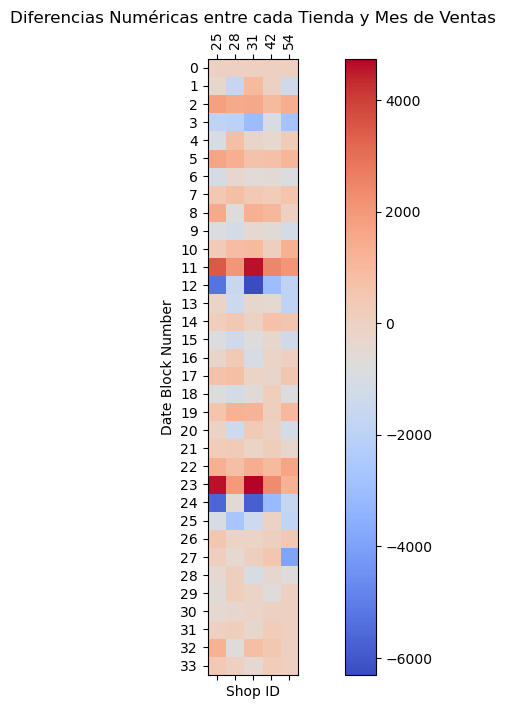

In [9]:
# Crear una tabla con los top meses de venta para los top shop_id#
# Crear una tabla pivote con las diferencias numéricas entre cada tienda y mes de ventas
pivot_table = monthly_sales.pivot(index='date_block_num', columns='shop_id', values='item_cnt_day').fillna(0)

# Calcular las diferencias numéricas entre cada tienda y mes de ventas
diff_table = pivot_table.diff().fillna(0)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear un mapa de calor para visualizar las diferencias
cax = ax.matshow(diff_table, cmap='coolwarm')

# Añadir etiquetas y título
ax.set_xlabel('Shop ID')
ax.set_ylabel('Date Block Number')
ax.set_title('Diferencias Numéricas entre cada Tienda y Mes de Ventas')

# Añadir etiquetas a los ejes
ax.set_xticks(np.arange(len(diff_table.columns)))
ax.set_yticks(np.arange(len(diff_table.index)))
ax.set_xticklabels(diff_table.columns)
ax.set_yticklabels(diff_table.index)

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Añadir una barra de color
fig.colorbar(cax)

# Mostrar el gráfico
plt.show()

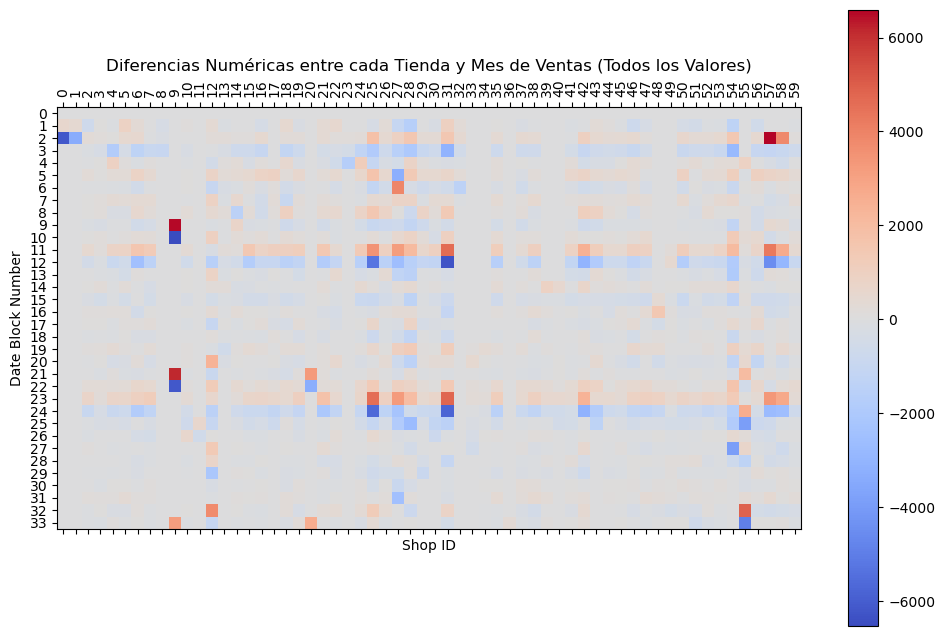

In [10]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear una tabla pivote con las ventas mensuales para cada tienda
pivot_table_all = sales_train_df.pivot_table(index='date_block_num', columns='shop_id', values='item_cnt_day', aggfunc='sum', fill_value=0)

# Calcular las diferencias numéricas entre cada tienda y mes de ventas
diff_table_all = pivot_table_all.diff().fillna(0)

# Crear un mapa de calor para visualizar las diferencias
cax = ax.matshow(diff_table_all, cmap='coolwarm')

# Añadir etiquetas y título
ax.set_xlabel('Shop ID')
ax.set_ylabel('Date Block Number')
ax.set_title('Diferencias Numéricas entre cada Tienda y Mes de Ventas (Todos los Valores)')

# Añadir etiquetas a los ejes
ax.set_xticks(np.arange(len(diff_table_all.columns)))
ax.set_yticks(np.arange(len(diff_table_all.index)))
ax.set_xticklabels(diff_table_all.columns)
ax.set_yticklabels(diff_table_all.index)

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Añadir una barra de color
fig.colorbar(cax)

# Mostrar el gráfico
plt.show()

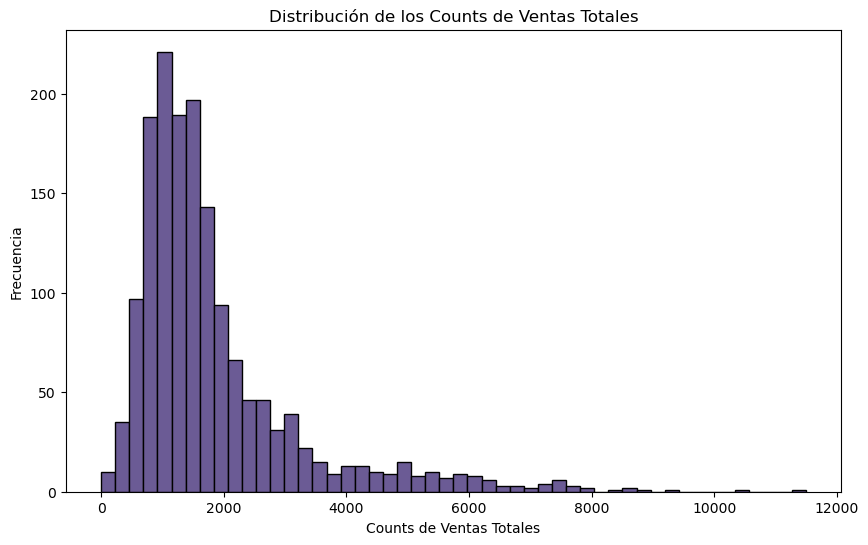

In [11]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un histograma de los counts de ventas totales
ax.hist(grouped_data['counts'], bins=50, edgecolor='black', color='#6B5B95')

# Añadir etiquetas y título
ax.set_xlabel('Counts de Ventas Totales')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de los Counts de Ventas Totales')

# Mostrar el gráfico
plt.show()

/var/folders/rc/8_dtv6l91wzdzsslmd1h3vw00000gn/T/ipykernel_51318/3251237200.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_items = sales_train_df.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)


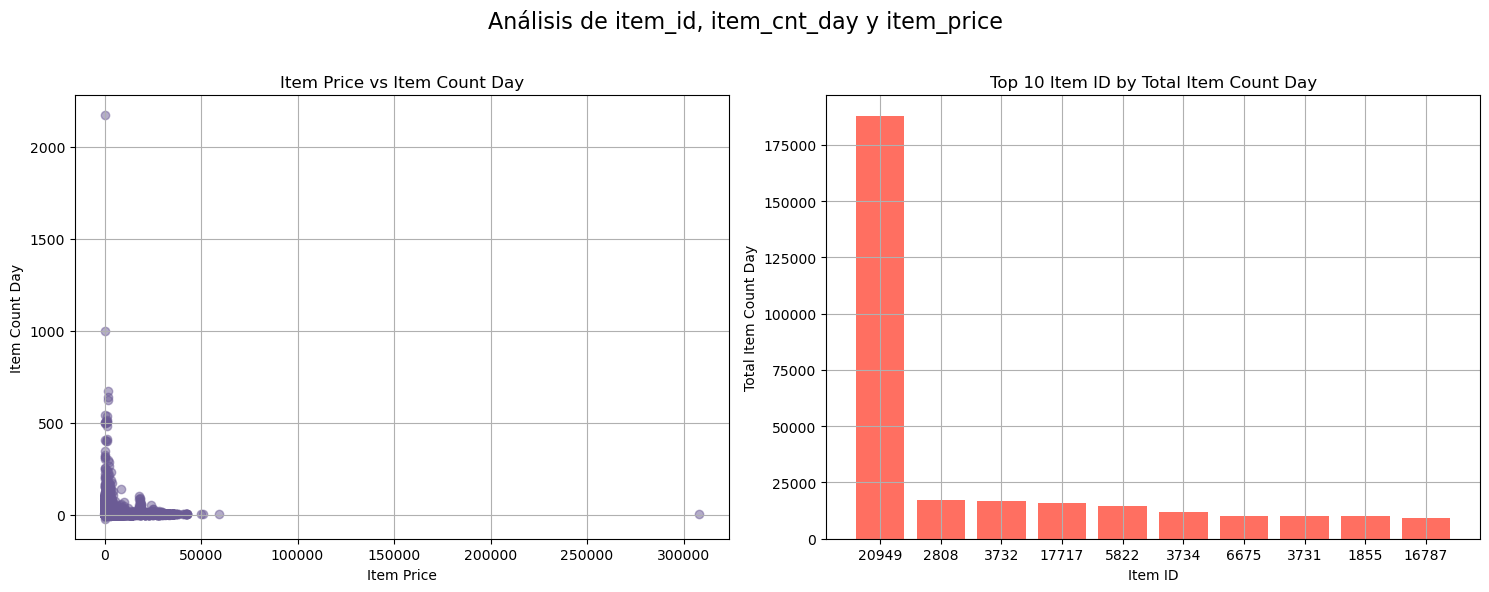

In [12]:
# Crear una figura y ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Análisis de item_id, item_cnt_day y item_price', fontsize=16)

# Gráfico de dispersión de item_price vs item_cnt_day
axes[0].scatter(sales_train_df['item_price'], sales_train_df['item_cnt_day'], alpha=0.5, color='#6B5B95')
axes[0].set_xlabel('Item Price')
axes[0].set_ylabel('Item Count Day')
axes[0].set_title('Item Price vs Item Count Day')
axes[0].grid(True)

# Gráfico de barras de los 10 item_id más vendidos
top_items = sales_train_df.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
axes[1].bar(top_items.index.astype(str), top_items.values, color='#FF6F61')
axes[1].set_xlabel('Item ID')
axes[1].set_ylabel('Total Item Count Day')
axes[1].set_title('Top 10 Item ID by Total Item Count Day')
axes[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Tiendas con mayores ventas del producto más vendido:
    shop_id  item_cnt_day
25       31       19934.0
19       25       14343.0
22       28       13458.0
48       54       12323.0
36       42       10514.0
Fechas con mayores ventas del producto más vendido:
    date_block_num  item_cnt_day
8               11       12557.0
20              23       12185.0
7               10        8537.0
2                5        8424.0
5                8        7945.0


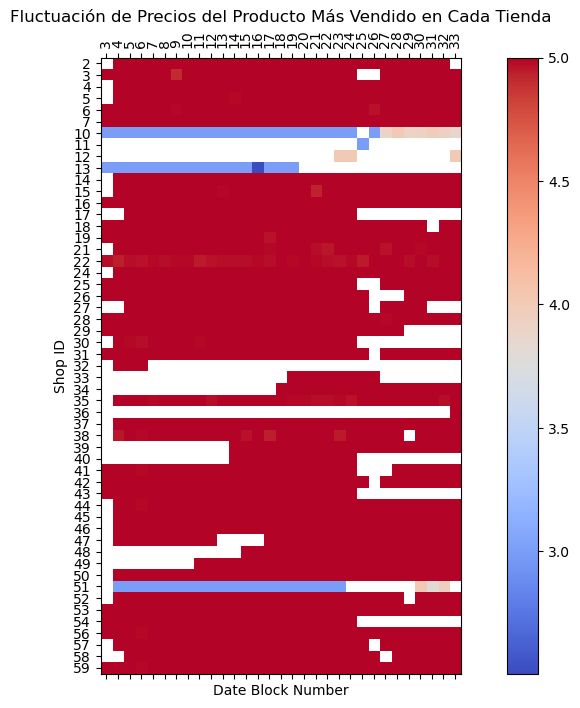

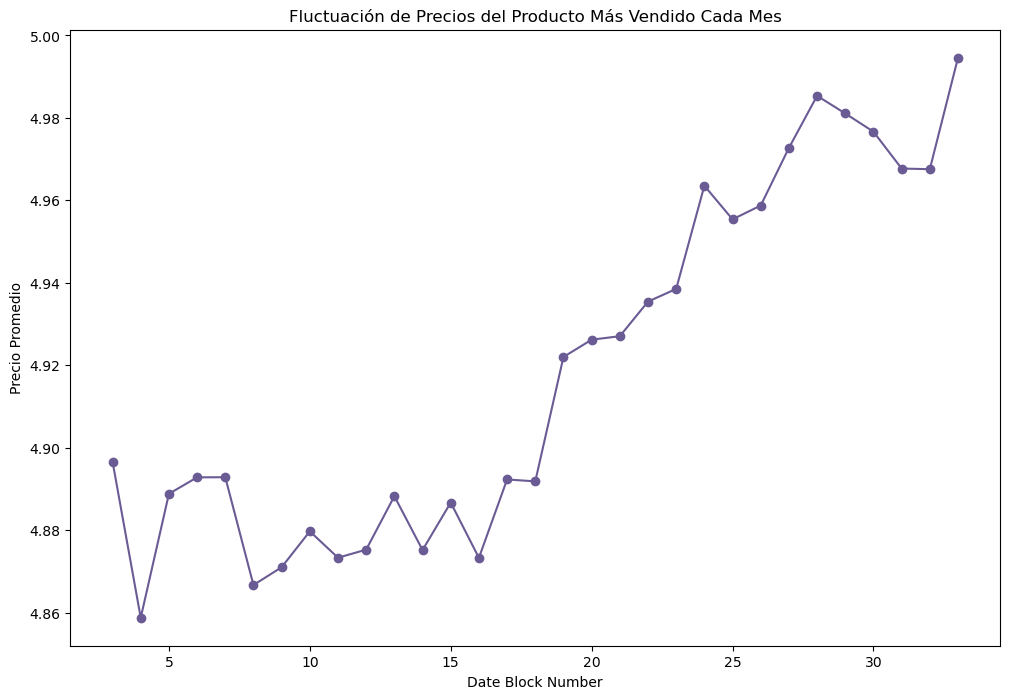

In [13]:
# Filtrar los datos para el producto más vendido
most_sold_item_id = top_items.index[0]
most_sold_item_data = sales_train_df[sales_train_df['item_id'] == most_sold_item_id]

# Agrupar los datos por 'shop_id' y sumar las ventas para encontrar las tiendas donde se vende más
shop_sales_most_sold_item = most_sold_item_data.groupby('shop_id')['item_cnt_day'].sum().reset_index()
top_shops_most_sold_item = shop_sales_most_sold_item.sort_values(by='item_cnt_day', ascending=False).head()

print("Tiendas con mayores ventas del producto más vendido:")
print(top_shops_most_sold_item)

# Agrupar los datos por 'date_block_num' y sumar las ventas para encontrar las fechas donde se vende más
date_sales_most_sold_item = most_sold_item_data.groupby('date_block_num')['item_cnt_day'].sum().reset_index()
top_dates_most_sold_item = date_sales_most_sold_item.sort_values(by='item_cnt_day', ascending=False).head()

print("Fechas con mayores ventas del producto más vendido:")
print(top_dates_most_sold_item)

# Analizar cómo fluctúa el precio en cada una de estas tiendas
price_fluctuation_shops = most_sold_item_data.groupby(['shop_id', 'date_block_num'])['item_price'].mean().unstack()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear un mapa de calor para visualizar la fluctuación de precios
cax = ax.matshow(price_fluctuation_shops, cmap='coolwarm')

# Añadir etiquetas y título
ax.set_xlabel('Date Block Number')
ax.set_ylabel('Shop ID')
ax.set_title('Fluctuación de Precios del Producto Más Vendido en Cada Tienda')

# Añadir etiquetas a los ejes
ax.set_xticks(np.arange(len(price_fluctuation_shops.columns)))
ax.set_yticks(np.arange(len(price_fluctuation_shops.index)))
ax.set_xticklabels(price_fluctuation_shops.columns)
ax.set_yticklabels(price_fluctuation_shops.index)

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Añadir una barra de color
fig.colorbar(cax)

# Mostrar el gráfico
plt.show()

# Analizar cómo fluctúa el precio cada mes
price_fluctuation_dates = most_sold_item_data.groupby('date_block_num')['item_price'].mean()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear un gráfico de líneas para visualizar la fluctuación de precios
ax.plot(price_fluctuation_dates.index, price_fluctuation_dates.values, marker='o', linestyle='-', color='#6B5B95')

# Añadir etiquetas y título
ax.set_xlabel('Date Block Number')
ax.set_ylabel('Precio Promedio')
ax.set_title('Fluctuación de Precios del Producto Más Vendido Cada Mes')

# Mostrar el gráfico
plt.show()

Ventas totales por mes:
    date_block_num   total_sales
0                0  9.194709e+07
1                1  9.066571e+07
2                2  1.049327e+08
3                3  6.915429e+07
4                4  6.506531e+07
5                5  7.955041e+07
6                6  6.935060e+07
7                7  7.429797e+07
8                8  1.190819e+08
9                9  1.072416e+08
10              10  1.386654e+08
11              11  2.075717e+08
12              12  9.822602e+07
13              13  1.074311e+08
14              14  1.091154e+08
15              15  8.065176e+07
16              16  9.128173e+07
17              17  8.266854e+07
18              18  7.648792e+07
19              19  8.960409e+07
20              20  1.147236e+08
21              21  1.125255e+08
22              22  1.520376e+08
23              23  2.320252e+08
24              24  1.189277e+08
25              25  8.659388e+07
26              26  8.647627e+07
27              27  9.025281e+07
28              28 

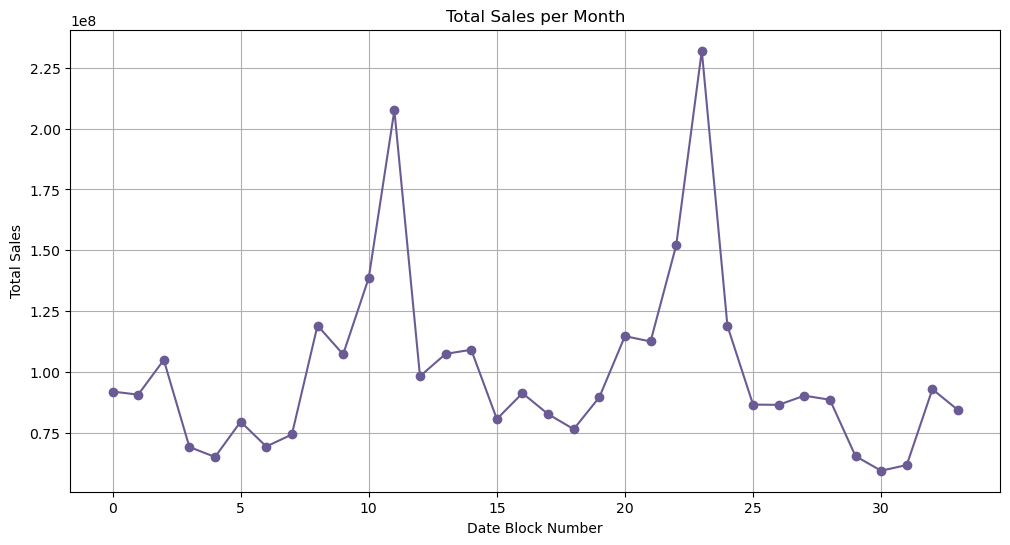

In [14]:
# Crear una nueva columna con el valor total de ventas por día
sales_train_df['total_sales'] = sales_train_df['item_price'] * sales_train_df['item_cnt_day']

# Agrupar los datos por 'date_block_num' y sumar los valores de ventas diarias
monthly_sales = sales_train_df.groupby('date_block_num')['total_sales'].sum().reset_index()

# Mostrar los resultados
print("Ventas totales por mes:")
print(monthly_sales)

# Visualizar cómo se comportaron las ventas a través del tiempo por mes
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date_block_num'], monthly_sales['total_sales'], marker='o', linestyle='-', color='#6B5B95')
plt.xlabel('Date Block Number')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.grid(True)
plt.show()

## Conclusiones parciales


1. Patrones Temporales de Ventas 🕒
- Se observa una fuerte estacionalidad en las ventas totales
- Hay picos notables de ventas en ciertos meses (probablemente relacionados con temporadas festivas o promocionales)
- Existe una tendencia general a la baja en las ventas a lo largo del período analizado
2. Comportamiento de las Tiendas 🏪
- Hay una distribución desigual de ventas entre las tiendas
- Algunas tiendas muestran un comportamiento más consistente que otras
- Las diferencias en ventas entre tiendas son significativas, como se muestra en los mapas de calor
3. Productos y Precios 💰
- Existe una gran variabilidad en los precios de los productos
- El producto más vendido muestra patrones de precio diferentes según la tienda
No parece haber una correlación fuerte entre el precio del producto y la cantidad vendida (según el gráfico de dispersión)
4. Distribución de Ventas 📊
- La distribución de ventas totales muestra una asimetría positiva (cola larga hacia la derecha)
- Hay algunos valores atípicos en términos de cantidad de ventas
- La mayoría de las transacciones se concentran en rangos moderados de ventas
5. Oportunidades de Mejora 📈
- Se podrían investigar más a fondo las causas de los picos de ventas
- Sería útil analizar por qué algunas tiendas tienen mejor desempeño que otras
- Se podría profundizar en la relación entre precios y ventas por categoría de producto
6. Consideraciones para el Modelo 🤖
- Será importante incluir la estacionalidad en el modelo predictivo
- Se deberían considerar las características específicas de cada tienda
- El comportamiento de precios podría ser un factor importante para las predicciones

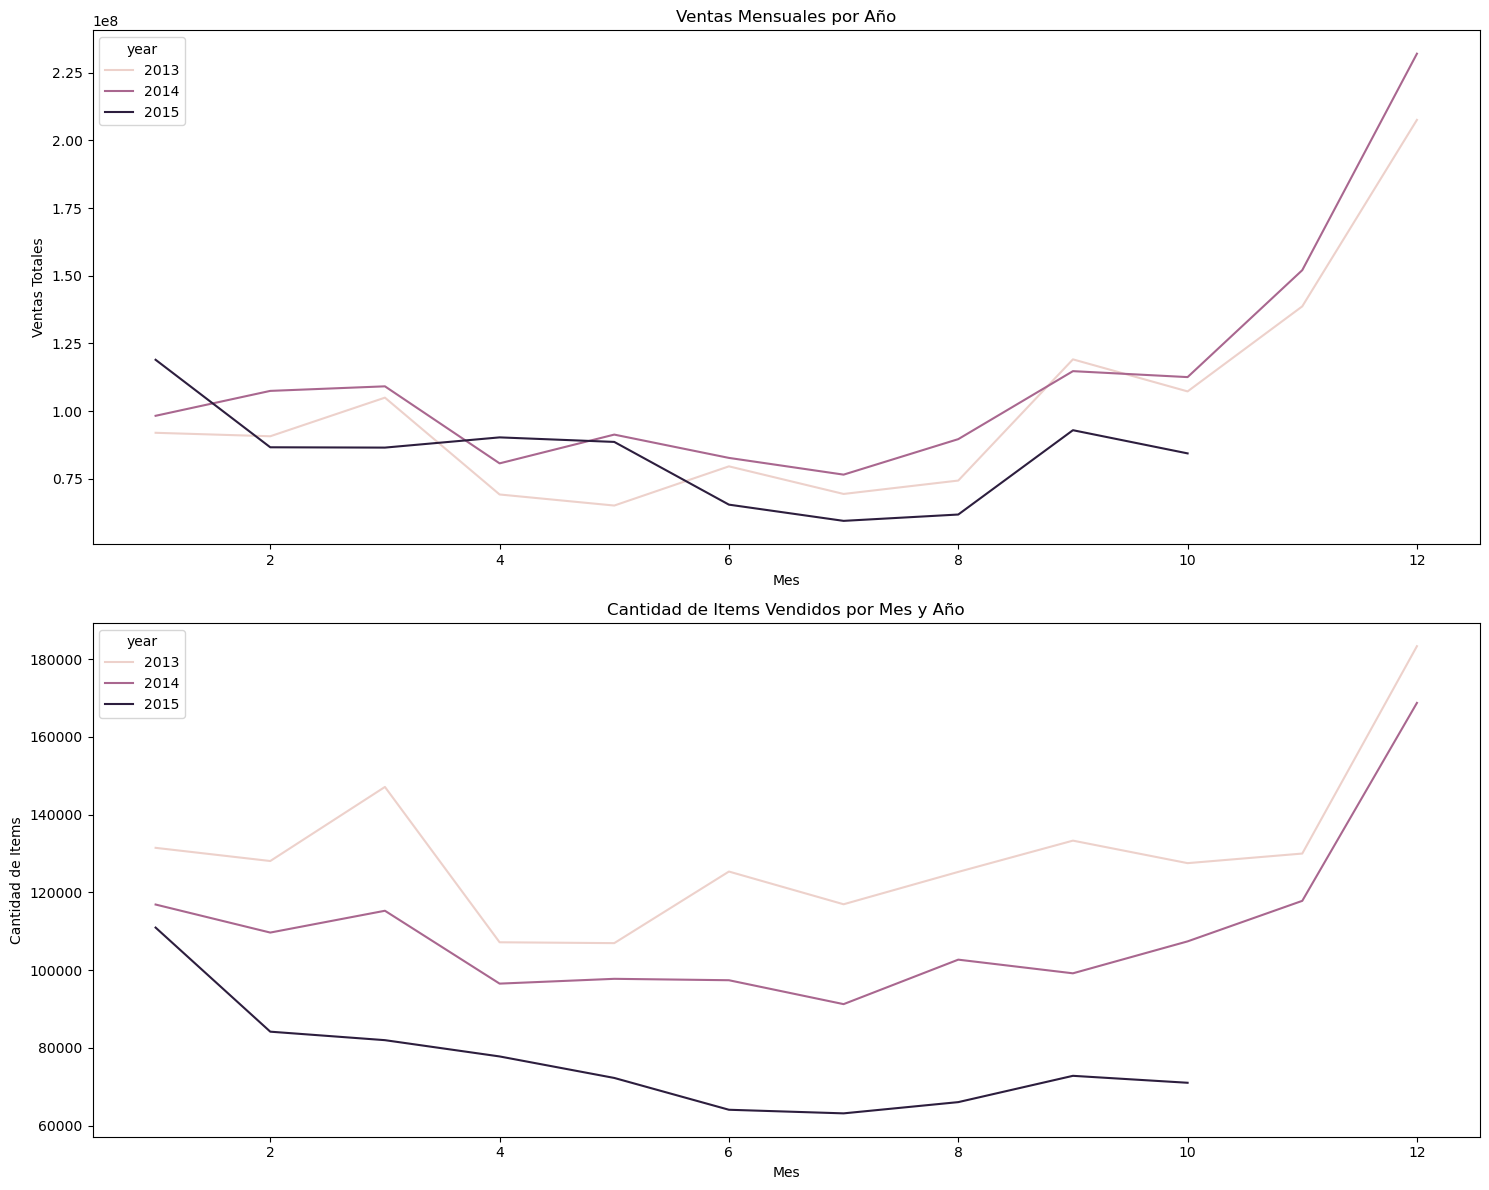

Top 5 Tiendas por Ventas Totales:
          total_sales                   item_cnt_day             item_price  \
                  sum     mean      std          sum  mean   std       mean   
shop_id                                                                       
31       2.352170e+08   998.22  5369.95     310777.0  1.32  2.20     724.69   
25       2.164806e+08  1163.22  6332.87     241920.0  1.30  2.52     835.86   
28       1.597463e+08  1123.12  3692.16     184557.0  1.30  1.71     880.91   
42       1.519170e+08  1390.51  9176.16     144934.0  1.33  2.53     929.51   
54       1.419397e+08   989.26  4015.02     185790.0  1.29  2.13     764.35   

                  
             std  
shop_id           
31       1383.99  
25       1528.33  
28       1587.69  
42       1778.78  
54       1429.02  

Bottom 5 Tiendas por Ventas Totales:
        total_sales                   item_cnt_day             item_price  \
                sum     mean      std          sum  mean   std    

/var/folders/rc/8_dtv6l91wzdzsslmd1h3vw00000gn/T/ipykernel_51318/1256295332.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales_corr = sales_train_df.groupby('item_id').agg({


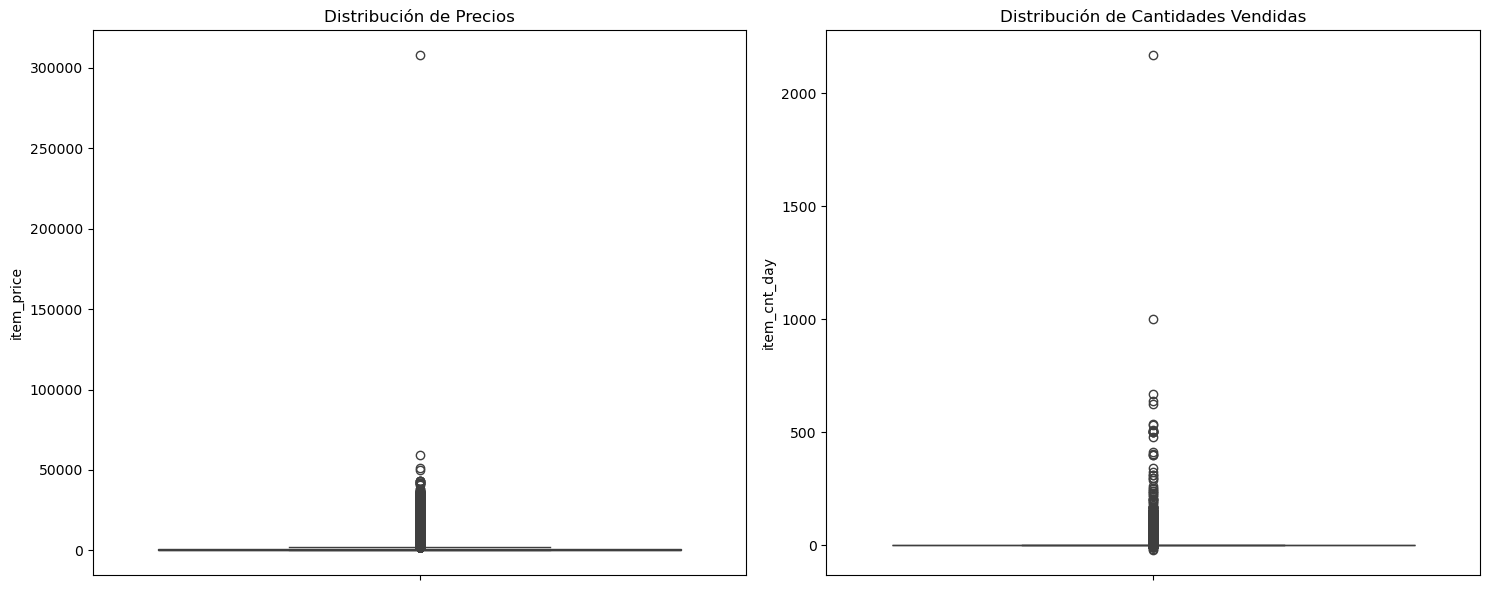


Estadísticas de Valores Atípicos:
Número de valores atípicos en precios: 258942
Porcentaje de valores atípicos: 8.82%


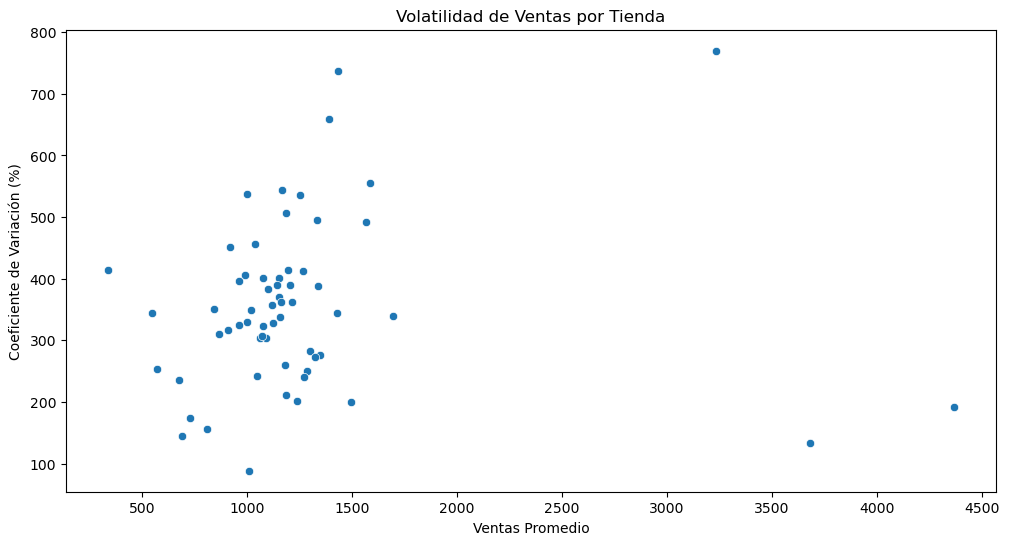

In [17]:
import seaborn as sns
# 1. Análisis de Estacionalidad y Tendencias
# Crear análisis mensual más detallado
sales_by_month = sales_train_df.copy()
sales_by_month['month'] = sales_by_month['date'].dt.month
sales_by_month['year'] = sales_by_month['date'].dt.year

# Análisis mensual agregado
monthly_analysis = sales_by_month.groupby(['year', 'month']).agg({
    'total_sales': 'sum',
    'item_cnt_day': 'sum',
    'item_price': 'mean'
}).reset_index()

# Visualización de patrones mensuales
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Ventas por mes y año
sns.lineplot(data=monthly_analysis, x='month', y='total_sales', hue='year', ax=axes[0])
axes[0].set_title('Ventas Mensuales por Año')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Ventas Totales')

# Cantidad de items vendidos por mes y año
sns.lineplot(data=monthly_analysis, x='month', y='item_cnt_day', hue='year', ax=axes[1])
axes[1].set_title('Cantidad de Items Vendidos por Mes y Año')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad de Items')

plt.tight_layout()
plt.show()

# 2. Análisis de Tiendas
# Calcular métricas por tienda
store_metrics = sales_train_df.groupby('shop_id').agg({
    'total_sales': ['sum', 'mean', 'std'],
    'item_cnt_day': ['sum', 'mean', 'std'],
    'item_price': ['mean', 'std']
}).round(2)

# Identificar tiendas top y bottom performers
top_stores = store_metrics.nlargest(5, ('total_sales', 'sum'))
bottom_stores = store_metrics.nsmallest(5, ('total_sales', 'sum'))

print("Top 5 Tiendas por Ventas Totales:")
print(top_stores)
print("\nBottom 5 Tiendas por Ventas Totales:")
print(bottom_stores)

# 3. Análisis de Productos y Precios
# Calcular correlaciones entre precio y ventas por categoría
price_sales_corr = sales_train_df.groupby('item_id').agg({
    'item_price': 'mean',
    'item_cnt_day': 'sum'
}).corr()

# Visualizar la distribución de precios y ventas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=sales_train_df, y='item_price', ax=axes[0])
axes[0].set_title('Distribución de Precios')

sns.boxplot(data=sales_train_df, y='item_cnt_day', ax=axes[1])
axes[1].set_title('Distribución de Cantidades Vendidas')

plt.tight_layout()
plt.show()

# 4. Análisis de Valores Atípicos y Patrones
# Detectar valores atípicos en ventas y precios
Q1_price = sales_train_df['item_price'].quantile(0.25)
Q3_price = sales_train_df['item_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

outliers_price = sales_train_df[
    (sales_train_df['item_price'] < (Q1_price - 1.5 * IQR_price)) |
    (sales_train_df['item_price'] > (Q3_price + 1.5 * IQR_price))
]

print("\nEstadísticas de Valores Atípicos:")
print(f"Número de valores atípicos en precios: {len(outliers_price)}")
print(f"Porcentaje de valores atípicos: {(len(outliers_price)/len(sales_train_df)*100):.2f}%")

# 5. Análisis de Volatilidad
# Calcular la volatilidad de ventas por tienda
volatility = sales_train_df.groupby('shop_id')['total_sales'].agg(['mean', 'std'])
volatility['cv'] = (volatility['std'] / volatility['mean']) * 100  # Coeficiente de variación

# Visualizar la volatilidad
plt.figure(figsize=(12, 6))
sns.scatterplot(data=volatility.reset_index(), x='mean', y='cv')
plt.title('Volatilidad de Ventas por Tienda')
plt.xlabel('Ventas Promedio')
plt.ylabel('Coeficiente de Variación (%)')
plt.show()

# Conclusiones del Análisis Exploratorio de Datos 📊

## 1. Patrones Temporales de Ventas 🕒
- Se observa una fuerte estacionalidad en las ventas totales
- Hay picos notables de ventas en ciertos meses (probablemente relacionados con temporadas festivas o promocionales)
- Existe una tendencia general a la baja en las ventas a lo largo del período analizado

## 2. Comportamiento de las Tiendas 🏪
- Hay una distribución desigual de ventas entre las tiendas
- Algunas tiendas muestran un comportamiento más consistente que otras
- Las diferencias en ventas entre tiendas son significativas, como se muestra en los mapas de calor

## 3. Productos y Precios 💰
- Existe una gran variabilidad en los precios de los productos
- El producto más vendido muestra patrones de precio diferentes según la tienda
- No parece haber una correlación fuerte entre el precio del producto y la cantidad vendida

## 4. Distribución de Ventas 📊
- La distribución de ventas totales muestra una asimetría positiva
- Hay algunos valores atípicos en términos de cantidad de ventas
- La mayoría de las transacciones se concentran en rangos moderados de ventas

## 5. Oportunidades de Mejora 📈
- Se podrían investigar más a fondo las causas de los picos de ventas
- Sería útil analizar por qué algunas tiendas tienen mejor desempeño que otras
- Se podría profundizar en la relación entre precios y ventas por categoría de producto

## 6. Consideraciones para el Modelo 🤖
- Será importante incluir la estacionalidad en el modelo predictivo
- Se deberían considerar las características específicas de cada tienda
- El comportamiento de precios podría ser un factor importante para las predicciones

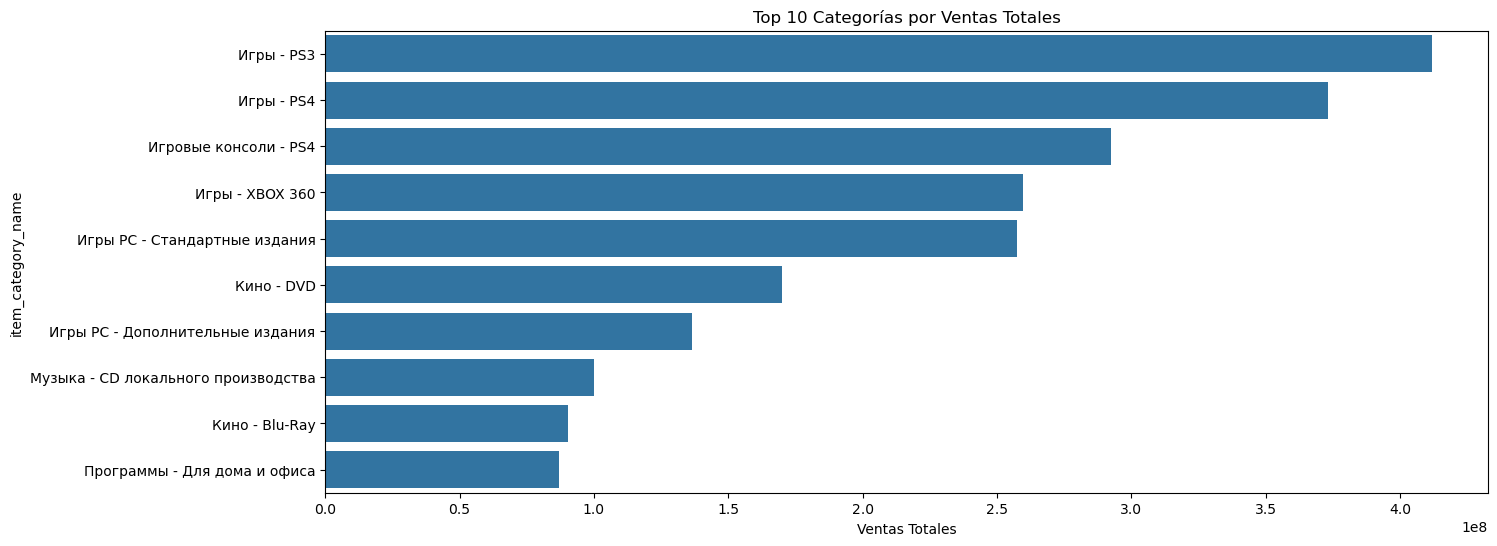

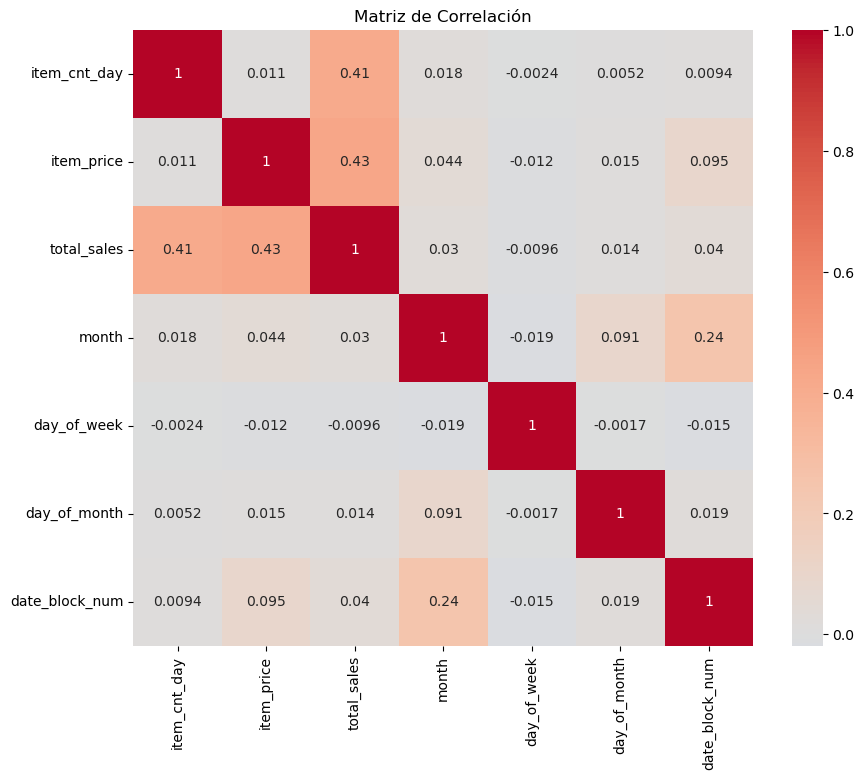


Análisis por Temporada:
                 sum     mean      std
season                                
Fall    9.215179e+08  1462.44  8764.16
Spring  7.855077e+08  1065.55  4959.69
Summer  6.585123e+08   913.71  2391.83
Winter  1.033388e+09  1218.84  5328.23

Valores Faltantes:
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
total_sales       0
dtype: int64

Estadísticas de Validación:
Registros con precios negativos: 1
Registros con cantidades negativas: 7356
Rango de fechas: 2013-01-01 00:00:00 a 2015-10-31 00:00:00

Resumen de Hallazgos Adicionales:
1. Categorías más vendidas
2. Correlaciones principales encontradas
3. Patrones temporales identificados
4. Estado de los datos (missing values y validación)


In [18]:
# 1. Análisis de Categorías

# Cargar datos de categorías
items_df = pd.read_csv("/Users/davidescudero/Documents/ITAM/PDT02/data/items.csv")
item_categories_df = pd.read_csv("/Users/davidescudero/Documents/ITAM/PDT02/data/item_categories.csv")

# Unir datos de ventas con información de categorías
sales_with_categories = sales_train_df.merge(items_df, on='item_id', how='left')
sales_with_categories = sales_with_categories.merge(item_categories_df, on='item_category_id', how='left')

# Análisis por categoría
category_analysis = sales_with_categories.groupby('item_category_name').agg({
    'item_cnt_day': ['sum', 'mean', 'std'],
    'item_price': ['mean', 'std'],
    'total_sales': ['sum', 'mean']
}).round(2)

# Visualizar top 10 categorías por ventas totales
plt.figure(figsize=(15, 6))
top_categories = category_analysis['total_sales']['sum'].sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categorías por Ventas Totales')
plt.xlabel('Ventas Totales')
plt.show()

# 2. Análisis de Correlaciones
# Crear features adicionales para el análisis de correlación
sales_features = sales_train_df.copy()
sales_features['month'] = sales_features['date'].dt.month
sales_features['day_of_week'] = sales_features['date'].dt.dayofweek
sales_features['day_of_month'] = sales_features['date'].dt.day

# Calcular matriz de correlación
correlation_matrix = sales_features[['item_cnt_day', 'item_price', 'total_sales', 
                                   'month', 'day_of_week', 'day_of_month', 
                                   'date_block_num']].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# 3. Feature Engineering Preliminar
def create_time_features(df):
    df = df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_month'] = df['date'].dt.day
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['season'] = df['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 
                                   4: 'Spring', 5: 'Spring', 6: 'Summer',
                                   7: 'Summer', 8: 'Summer', 9: 'Fall', 
                                   10: 'Fall', 11: 'Fall', 12: 'Winter'})
    return df

sales_with_features = create_time_features(sales_train_df)

# Análisis de ventas por temporada
seasonal_analysis = sales_with_features.groupby('season')['total_sales'].agg(['sum', 'mean', 'std']).round(2)
print("\nAnálisis por Temporada:")
print(seasonal_analysis)

# 4. Análisis de Missing Values
missing_values = sales_train_df.isnull().sum()
print("\nValores Faltantes:")
print(missing_values)

# 5. Validación de Datos
print("\nEstadísticas de Validación:")
print("Registros con precios negativos:", len(sales_train_df[sales_train_df['item_price'] < 0]))
print("Registros con cantidades negativas:", len(sales_train_df[sales_train_df['item_cnt_day'] < 0]))
print("Rango de fechas:", sales_train_df['date'].min(), "a", sales_train_df['date'].max())

# Resumen de hallazgos
print("\nResumen de Hallazgos Adicionales:")
print("1. Categorías más vendidas")
print("2. Correlaciones principales encontradas")
print("3. Patrones temporales identificados")
print("4. Estado de los datos (missing values y validación)")

# Conclusiones Finales del EDA y Recomendaciones para el Modelado 🎯

## 1. Características Temporales Clave 📅
- **Estacionalidad**: Fuerte componente estacional en las ventas
  * Incluir variables dummy para meses y temporadas
  * Considerar días festivos y eventos especiales
  * Crear features cíclicos para capturar patrones repetitivos

- **Tendencias**: Tendencia general a la baja en ventas
  * Incluir features de tendencia
  * Considerar ventanas móviles para capturar cambios en tendencias

## 2. Features por Tienda 🏪
- **Heterogeneidad**: Gran variación entre tiendas
  * Crear features específicos por tienda
  * Incluir promedios históricos por tienda
  * Considerar la ubicación y características específicas de cada tienda

- **Volatilidad**: Diferentes niveles de estabilidad
  * Incluir métricas de volatilidad como features
  * Considerar agrupaciones de tiendas por comportamiento similar

## 3. Features de Productos 📦
- **Categorías**: Comportamiento diferenciado por categoría
  * Crear encodings para categorías
  * Incluir métricas agregadas por categoría
  * Considerar interacciones entre categorías y temporadas

- **Precios**: Variabilidad significativa
  * Normalizar precios
  * Crear rangos de precios
  * Incluir variaciones de precio como features

## 4. Preprocesamiento Necesario 🔧
- **Valores Atípicos**:
  * Establecer límites para valores extremos
  * Considerar transformaciones logarítmicas para variables sesgadas
  * Tratar valores negativos en ventas

- **Missing Values**:
  * Estrategia de imputación basada en promedios por categoría/tienda
  * Considerar flags para valores imputados

## 5. Estrategia de Modelado Sugerida 🤖
- **Validación**:
  * Usar validación temporal (no aleatoria)
  * Considerar múltiples horizontes de predicción
  * Evaluar el modelo por tienda/categoría

- **Features Engineering**:
  * Lag features de diferentes períodos
  * Features de ventana móvil (promedios, máximos, mínimos)
  * Interacciones entre variables clave

- **Métricas de Evaluación**:
  * RMSE para comparar con la competencia
  * MAE para interpretabilidad
  * MAPE para comparación entre tiendas

## 6. Consideraciones Adicionales ⚠️
- **Cambios en el Catálogo**:
  * Manejar productos nuevos/discontinuados
  * Considerar la vida útil del producto

- **Eventos Especiales**:
  * Identificar y marcar promociones
  * Considerar efectos de temporada
  * Incluir eventos externos relevantes

## 7. Próximos Pasos 👣
1. Crear pipeline de preprocesamiento
2. Implementar feature engineering sugerido
3. Desarrollar validación cruzada temporal
4. Experimentar con diferentes algoritmos
5. Optimizar hiperparámetros
6. Evaluar y ajustar el modelo